1. Investiga un caso en la vida real donde podremos aplicar un modelo de Regresión Logística. Fundamenta.
La regresión logística se usa para predecir resultados con dos opciones, como si un tweet tiene un sentimiento positivo o no.

 Elegí analizar tweets en español sobre COVID-19 porque:

* Es útil para entender opiniones en redes sociales.
* Permite un gráfico simple para ver los resultados.

2. Crea o selecciona un datasets que te permita entrenar tu modelo para abordar la problemática.

cargamos el dataset, mostramos las primeras fulas y las columnas disponibles. Luego seleccionamos y limpiamos columnas relevantes. Convertimos el sentimienot a binario (1= positivo, 0= negativo), eliminamos las filas donde 'label' sigue siendo NAN, creamos una variable independiente simple y mostramos las primeras filas despues de la limpieza.

In [23]:
import pandas as pd


data = pd.read_csv('./covid-19.csv', encoding='latin1')

print("Primeras filas del dataset:")
print(data.head())
print("\nColumnas disponibles:")
print(data.columns)

data = data[['tweet_text', 'label']].dropna()

data['label'] = data['label'].map({1: 1, 2: 0, 3: 0}) 

data = data.dropna(subset=['label'])

data['text_length'] = data['tweet_text'].str.len()

print("\nDatos limpios:")
print(data.head())
print("\nValores únicos en 'label' después del mapeo:", data['label'].unique())

Primeras filas del dataset:
       tweet_id  label                                         tweet_text
0  1.360342e+18      1  4,000 a day dying from the so called Covid-19 ...
1  1.382896e+18      2  Pranam message for today manifested in Dhyan b...
2  1.375673e+18      2  Hyderabad-based ?@BharatBiotech? has sought fu...
3  1.381311e+18      1  Confirmation that Chinese #vaccines "dont hav...
4  1.362166e+18      3  Lab studies suggest #Pfizer, #Moderna vaccines...

Columnas disponibles:
Index(['tweet_id', 'label', 'tweet_text'], dtype='object')

Datos limpios:
                                          tweet_text  label  text_length
0  4,000 a day dying from the so called Covid-19 ...      1          135
1  Pranam message for today manifested in Dhyan b...      0          298
2  Hyderabad-based ?@BharatBiotech? has sought fu...      0          251
3  Confirmation that Chinese #vaccines "dont hav...      1          282
4  Lab studies suggest #Pfizer, #Moderna vaccines...      0      

3. Crea un modelo de regresión logística utilizando la librería Scikit Learn y entrenalo con los datos del datasets.

preparamos las variables, dividimos en entrenamiento y prueba, creamos y entrenamos el modelo luego se imprimen las precisión 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data[['text_length']]  
y = data['label']        

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print(f"Precisión en entrenamiento: {model.score(X_train, y_train):.2f}")

Precisión en entrenamiento: 0.93


4. Realiza un gráfico con la librería matplotlib de los datos de entrenamiento y las predicciones realizadas por el modelo.

Se realiza las prediciones y creamos el grafico 

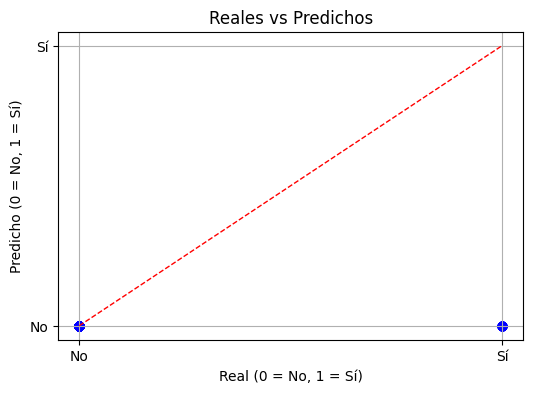

In [22]:
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)


plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--', lw=1) 
plt.xlabel('Real (0 = No, 1 = Sí)')
plt.ylabel('Predicho (0 = No, 1 = Sí)')
plt.title('Reales vs Predichos')
plt.yticks([0, 1], ['No', 'Sí'])
plt.xticks([0, 1], ['No', 'Sí'])
plt.grid(True)
plt.show()